# Cargill Ocean Transportation Datathon 2026

1. Problem Overview
2. Input Data
3. Display Data Summary
4. Define Helper Functions
5. Define Enhanced Voyage Economics Function
6. Calculate Voyage Economics
7. Analyze FFA Rates
8. ML Forecasting & Monte Carlo Risk Analysis
9. Define Assignment Algorithms
10. Define Profit Maximization
11. Compare Assignment Algorithms
12. Visualize Assignment Results
13. Show Detail Assignment Table
14. Define Sensitivity Analysis
15. Run Sensitivity Analysis
16. Generate Comprehensive Report
17. Run Scenario Analysis
18. Visualize Scenario Comparison
19. Export Results


# 1. Problem Overview


# 2. Input Data

In [6]:
import pandas as pd

vessels = pd.DataFrame([
    {
        "VESSEL_NAME": "ANN BELL",
        "DWT": 180803,
        "HIRE_RATE": 11750,
        "WARRANTED_LADEN_SPEED": 13.5,
        "WARRANTED_BALLAST_SPEED": 14.5,
        "WARRANTED_LADEN_VLSFO": 60.0,
        "WARRANTED_BALLAST_VLSFO": 55.0,
        "WARRANTED_LADEN_MGO": 2.0,
        "WARRANTED_BALLAST_MGO": 2.0,
        "ECO_LADEN_SPEED": 12.0,
        "ECO_BALLAST_SPEED": 12.5,
        "ECO_LADEN_VLSFO": 42.0,
        "ECO_BALLAST_VLSFO": 38.0,
        "ECO_LADEN_MGO": 2.0,
        "ECO_BALLAST_MGO": 2.0,
        "IDLE_MGO": 2.0,
        "WORKING_MGO": 3.0,
        "WORKING_VLSFO":0.0,
        "IDLE_VLSFO":0.0,
        "CURRENT_PORT": "Qingdao", #check 
        "ETD": "2026-02-25", #check
        "BUNKER_VLSFO_REMAINING": 401.3,
        "BUNKER_MGO_REMAINING": 45.1,
        "VESSEL_TYPE": "COMMITTED" 
    },
    {
        "VESSEL_NAME": "OCEAN HORIZON",
        "DWT": 181550,
        "HIRE_RATE": 15750,
        "WARRANTED_LADEN_SPEED": 13.8,
        "WARRANTED_BALLAST_SPEED": 14.8,
        "WARRANTED_LADEN_VLSFO": 61.0,
        "WARRANTED_BALLAST_VLSFO": 56.5,
        "WARRANTED_LADEN_MGO": 1.8,
        "WARRANTED_BALLAST_MGO": 1.8,
        "ECO_LADEN_SPEED": 12.3,
        "ECO_BALLAST_SPEED": 12.8,
        "ECO_LADEN_VLSFO": 43.0,
        "ECO_BALLAST_VLSFO": 39.5,
        "ECO_LADEN_MGO": 1.8,
        "ECO_BALLAST_MGO": 1.8,
        "IDLE_MGO":1.8,
        "WORKING_MGO": 3.2,
        "WORKING_VLSFO":0.0,
        "IDLE_VLSFO":0.0,
        "CURRENT_PORT": "Map Ta Phut",
        "ETD": "2026-03-01",
        "BUNKER_VLSFO_REMAINING": 265.8,
        "BUNKER_MGO_REMAINING": 64.3,
        "VESSEL_TYPE": "COMMITTED"
    },
    {
        "VESSEL_NAME": "PACIFIC GLORY",
        "DWT": 182320,
        "HIRE_RATE": 14800,
        "WARRANTED_LADEN_SPEED": 13.5,
        "WARRANTED_BALLAST_SPEED": 14.2,
        "WARRANTED_LADEN_VLSFO": 59.0,
        "WARRANTED_BALLAST_VLSFO": 54.0,
        "WARRANTED_LADEN_MGO": 1.9,
        "WARRANTED_BALLAST_MGO": 1.9,
        "ECO_LADEN_SPEED": 12.2,
        "ECO_BALLAST_SPEED": 12.7,
        "ECO_LADEN_VLSFO": 44.0,
        "ECO_BALLAST_VLSFO": 40.0,
        "ECO_LADEN_MGO": 1.9,
        "ECO_BALLAST_MGO": 1.9,
        "IDLE_MGO": 2.0,
        "WORKING_MGO": 3.0,
        "WORKING_VLSFO":0.0,
        "IDLE_VLSFO":0.0,
        "CURRENT_PORT": "Gwangyang",
        "ETD": "2026-03-10",
        "BUNKER_VLSFO_REMAINING": 601.9,
        "BUNKER_MGO_REMAINING": 98.1,
        "VESSEL_TYPE": "COMMITTED" 
    },
    {
        "VESSEL_NAME": "GOLDEN ASCENT",
        "DWT": 179965,
        "HIRE_RATE": 13950,
        "WARRANTED_LADEN_SPEED": 13.0,
        "WARRANTED_BALLAST_SPEED": 14.0,
        "WARRANTED_LADEN_VLSFO": 58.0,
        "WARRANTED_BALLAST_VLSFO": 53.0,
        "WARRANTED_LADEN_MGO": 2.0,
        "WARRANTED_BALLAST_MGO": 2.0,
        "ECO_LADEN_SPEED": 11.8,
        "ECO_BALLAST_SPEED": 12.3,
        "ECO_LADEN_VLSFO": 41.0,
        "ECO_BALLAST_VLSFO": 37.0,
        "ECO_LADEN_MGO": 2.0,
        "ECO_BALLAST_MGO": 2.0,
        "IDLE_MGO": 1.9,
        "WORKING_MGO": 3.1,
        "WORKING_VLSFO":0.0,
        "IDLE_VLSFO":0.0,
        "CURRENT_PORT": "Fangcheng",
        "ETD": "2026-03-08",
        "BUNKER_VLSFO_REMAINING": 793.3,
        "BUNKER_MGO_REMAINING": 17.1,
        "VESSEL_TYPE": "COMMITTED"
    }
])


In [7]:

cargoes = pd.DataFrame([
    {
        "ROUTE": "West Africa - China",
        "CUSTOMER": "EGA",
        "COMMODITY": "Bauxite",
        "QTY": 180000,
        "QTY_TOLERANCE": 0.10,  # +/- 10%
        "LAYCAN_START": "2026-04-02",
        "LAYCAN_END": "2026-04-10",
        "FREIGHT_RATE": 23.0,
        "LOAD_PORT": "Kamsar",
        "LOAD_TERMS": "Anchorage Loading",
        "DISCHARGE_PORT": "Qingdao",
        "DISCHARGE_TERMS": "Other Chinese ports allowed on same TCE basis",
        "LOAD_PWWD": 30000,
        "DISCH_PWWD": 25000,
        "LOAD_TURN_TIME": 12,
        "DISCH_TURN_TIME": 12,
        "PORT_COST": 0,
        "COMMISSION": 0.0125,
        "CARGO_TYPE": "COMMITTED"
    },
    {
        "ROUTE": "Australia - China",
        "CUSTOMER": "BHP",
        "COMMODITY": "Iron Ore",
        "QTY": 160000,
        "QTY_TOLERANCE": 0.10,
        "LAYCAN_START": "2026-03-07",
        "LAYCAN_END": "2026-03-11",
        "FREIGHT_RATE": 9.0,
        "LOAD_PORT": "Port Hedland",
        "LOAD_TERMS": "Half freight applies to excess over 176,000 MT",
        "DISCHARGE_PORT": "Lianyungang",
        "DISCHARGE_TERMS": "",
        "LOAD_PWWD": 80000,
        "DISCH_PWWD": 30000,
        "LOAD_TURN_TIME": 12,
        "DISCH_TURN_TIME": 24,
        "PORT_COST": 380000,  # 260K + 120K
        "COMMISSION": 0.0375,
        "CARGO_TYPE": "COMMITTED"
    },
    {
        "ROUTE": "Brazil - China",
        "CUSTOMER": "CSN",
        "COMMODITY": "Iron Ore",
        "QTY": 180000,
        "QTY_TOLERANCE": 0.10,
        "LAYCAN_START": "2026-04-01",
        "LAYCAN_END": "2026-04-08",
        "FREIGHT_RATE": 22.3,
        "LOAD_PORT": "Itaguai",
        "LOAD_TERMS": "Base 17.8M draft",
        "DISCHARGE_PORT": "Qingdao",
        "DISCHARGE_TERMS": "Other Far East ports including river ports allowed",
        "LOAD_PWWD": 60000,
        "DISCH_PWWD": 30000,
        "LOAD_TURN_TIME": 6,
        "DISCH_TURN_TIME": 24,
        "PORT_COST": 165000,  # 75K + 90K
        "COMMISSION": 0.0375,
        "CARGO_TYPE": "COMMITTED"
    }
])

In [8]:
market_vessels = pd.DataFrame([
    {"VESSEL_NAME": "ATLANTIC FORTUNE", "DWT": 181200, "WARRANTED_LADEN_SPEED": 13.8, "WARRANTED_BALLAST_SPEED": 14.6,
        "WARRANTED_LADEN_VLSFO": 60.0, "WARRANTED_BALLAST_VLSFO": 56.0, "WARRANTED_LADEN_MGO": 2.0, "WARRANTED_BALLAST_MGO": 2.0,
        "ECO_LADEN_SPEED": 12.3, "ECO_BALLAST_SPEED": 12.9, "ECO_LADEN_VLSFO": 43.0, "ECO_BALLAST_VLSFO": 39.5,
        "ECO_LADEN_MGO": 2.0, "ECO_BALLAST_MGO": 2.0, "IDLE_VLSFO": 2.0, "IDLE_MGO": 0.0, "WORKING_VLSFO": 3.0, "WORKING_MGO": 0.0,
        "CURRENT_PORT": "Paradip", "ETD": "2026-03-02", "BUNKER_VLSFO_REMAINING": 512.4, "BUNKER_MGO_REMAINING": 38.9, "VESSEL_TYPE": "MARKET"},
    {"VESSEL_NAME": "PACIFIC VANGUARD", "DWT": 182050, "WARRANTED_LADEN_SPEED": 13.6, "WARRANTED_BALLAST_SPEED": 14.3,
        "WARRANTED_LADEN_VLSFO": 59.0, "WARRANTED_BALLAST_VLSFO": 54.0, "WARRANTED_LADEN_MGO": 1.9, "WARRANTED_BALLAST_MGO": 1.9,
        "ECO_LADEN_SPEED": 12.0, "ECO_BALLAST_SPEED": 12.5, "ECO_LADEN_VLSFO": 42.0, "ECO_BALLAST_VLSFO": 38.0,
        "ECO_LADEN_MGO": 1.9, "ECO_BALLAST_MGO": 1.9, "IDLE_VLSFO": 1.9, "IDLE_MGO": 0.0, "WORKING_VLSFO": 3.0, "WORKING_MGO": 0.0,
        "CURRENT_PORT": "Caofeidian", "ETD": "2026-02-26", "BUNKER_VLSFO_REMAINING": 420.3, "BUNKER_MGO_REMAINING": 51.0, "VESSEL_TYPE": "MARKET"},
    {"VESSEL_NAME": "CORAL EMPEROR", "DWT": 180450, "WARRANTED_LADEN_SPEED": 13.4, "WARRANTED_BALLAST_SPEED": 14.1,
        "WARRANTED_LADEN_VLSFO": 58.0, "WARRANTED_BALLAST_VLSFO": 53.0, "WARRANTED_LADEN_MGO": 2.0, "WARRANTED_BALLAST_MGO": 2.0,
        "ECO_LADEN_SPEED": 11.9, "ECO_BALLAST_SPEED": 12.3, "ECO_LADEN_VLSFO": 40.0, "ECO_BALLAST_VLSFO": 36.5,
        "ECO_LADEN_MGO": 2.0, "ECO_BALLAST_MGO": 2.0, "IDLE_VLSFO": 2.0, "IDLE_MGO": 0.0, "WORKING_VLSFO": 3.1, "WORKING_MGO": 0.0,
        "CURRENT_PORT": "Rotterdam", "ETD": "2026-03-05", "BUNKER_VLSFO_REMAINING": 601.7, "BUNKER_MGO_REMAINING": 42.3, "VESSEL_TYPE": "MARKET"},
    {"VESSEL_NAME": "EVEREST OCEAN", "DWT": 179950, "WARRANTED_LADEN_SPEED": 13.7, "WARRANTED_BALLAST_SPEED": 14.5,
        "WARRANTED_LADEN_VLSFO": 61.0, "WARRANTED_BALLAST_VLSFO": 56.5, "WARRANTED_LADEN_MGO": 1.8, "WARRANTED_BALLAST_MGO": 1.8,
        "ECO_LADEN_SPEED": 12.4, "ECO_BALLAST_SPEED": 12.8, "ECO_LADEN_VLSFO": 43.5, "ECO_BALLAST_VLSFO": 39.0,
        "ECO_LADEN_MGO": 1.8, "ECO_BALLAST_MGO": 1.8, "IDLE_VLSFO": 1.8, "IDLE_MGO": 0.0, "WORKING_VLSFO": 3.0, "WORKING_MGO": 0.0,
        "CURRENT_PORT": "Xiamen", "ETD": "2026-03-03", "BUNKER_VLSFO_REMAINING": 478.2, "BUNKER_MGO_REMAINING": 56.4, "VESSEL_TYPE": "MARKET"},
    {"VESSEL_NAME": "POLARIS SPIRIT", "DWT": 181600, "WARRANTED_LADEN_SPEED": 13.9, "WARRANTED_BALLAST_SPEED": 14.7,
        "WARRANTED_LADEN_VLSFO": 62.0, "WARRANTED_BALLAST_VLSFO": 57.0, "WARRANTED_LADEN_MGO": 1.9, "WARRANTED_BALLAST_MGO": 1.9,
        "ECO_LADEN_SPEED": 12.5, "ECO_BALLAST_SPEED": 13.0, "ECO_LADEN_VLSFO": 44.0, "ECO_BALLAST_VLSFO": 40.0,
        "ECO_LADEN_MGO": 1.9, "ECO_BALLAST_MGO": 1.9, "IDLE_VLSFO": 2.0, "IDLE_MGO": 0.0, "WORKING_VLSFO": 3.1, "WORKING_MGO": 0.0,
        "CURRENT_PORT": "Kandla", "ETD": "2026-02-28", "BUNKER_VLSFO_REMAINING": 529.8, "BUNKER_MGO_REMAINING": 47.1, "VESSEL_TYPE": "MARKET"},
    {"VESSEL_NAME": "IRON CENTURY", "DWT": 182100, "WARRANTED_LADEN_SPEED": 13.5, "WARRANTED_BALLAST_SPEED": 14.2,
        "WARRANTED_LADEN_VLSFO": 59.0, "WARRANTED_BALLAST_VLSFO": 54.0, "WARRANTED_LADEN_MGO": 2.1, "WARRANTED_BALLAST_MGO": 2.1,
        "ECO_LADEN_SPEED": 12.0, "ECO_BALLAST_SPEED": 12.5, "ECO_LADEN_VLSFO": 41.0, "ECO_BALLAST_VLSFO": 37.5,
        "ECO_LADEN_MGO": 2.1, "ECO_BALLAST_MGO": 2.1, "IDLE_VLSFO": 2.1, "IDLE_MGO": 0.0, "WORKING_VLSFO": 3.2, "WORKING_MGO": 0.0,
        "CURRENT_PORT": "Port Talbot", "ETD": "2026-03-09", "BUNKER_VLSFO_REMAINING": 365.6, "BUNKER_MGO_REMAINING": 60.7, "VESSEL_TYPE": "MARKET"},
    {"VESSEL_NAME": "MOUNTAIN TRADER", "DWT": 180890, "WARRANTED_LADEN_SPEED": 13.3, "WARRANTED_BALLAST_SPEED": 14.0,
        "WARRANTED_LADEN_VLSFO": 58.0, "WARRANTED_BALLAST_VLSFO": 53.0, "WARRANTED_LADEN_MGO": 2.0, "WARRANTED_BALLAST_MGO": 2.0,
        "ECO_LADEN_SPEED": 12.1, "ECO_BALLAST_SPEED": 12.6, "ECO_LADEN_VLSFO": 42.0, "ECO_BALLAST_VLSFO": 38.0,
        "ECO_LADEN_MGO": 2.0, "ECO_BALLAST_MGO": 2.0, "IDLE_VLSFO": 2.0, "IDLE_MGO": 0.0, "WORKING_VLSFO": 3.1, "WORKING_MGO": 0.0,
        "CURRENT_PORT": "Gwangyang", "ETD": "2026-03-06", "BUNKER_VLSFO_REMAINING": 547.1, "BUNKER_MGO_REMAINING": 32.4, "VESSEL_TYPE": "MARKET"},
    {"VESSEL_NAME": "NAVIS PRIDE", "DWT": 181400, "WARRANTED_LADEN_SPEED": 13.8, "WARRANTED_BALLAST_SPEED": 14.5,
        "WARRANTED_LADEN_VLSFO": 61.0, "WARRANTED_BALLAST_VLSFO": 56.0, "WARRANTED_LADEN_MGO": 1.8, "WARRANTED_BALLAST_MGO": 1.8,
        "ECO_LADEN_SPEED": 12.6, "ECO_BALLAST_SPEED": 13.0, "ECO_LADEN_VLSFO": 44.0, "ECO_BALLAST_VLSFO": 39.0,
        "ECO_LADEN_MGO": 1.8, "ECO_BALLAST_MGO": 1.8, "IDLE_VLSFO": 1.8, "IDLE_MGO": 0.0, "WORKING_VLSFO": 3.0, "WORKING_MGO": 0.0,
        "CURRENT_PORT": "Mundra", "ETD": "2026-02-27", "BUNKER_VLSFO_REMAINING": 493.8, "BUNKER_MGO_REMAINING": 45.2, "VESSEL_TYPE": "MARKET"},
    {"VESSEL_NAME": "AURORA SKY", "DWT": 179880, "WARRANTED_LADEN_SPEED": 13.4, "WARRANTED_BALLAST_SPEED": 14.1,
        "WARRANTED_LADEN_VLSFO": 58.0, "WARRANTED_BALLAST_VLSFO": 53.0, "WARRANTED_LADEN_MGO": 2.0, "WARRANTED_BALLAST_MGO": 2.0,
        "ECO_LADEN_SPEED": 12.0, "ECO_BALLAST_SPEED": 12.5, "ECO_LADEN_VLSFO": 41.0, "ECO_BALLAST_VLSFO": 37.5,
        "ECO_LADEN_MGO": 2.0, "ECO_BALLAST_MGO": 2.0, "IDLE_VLSFO": 2.0, "IDLE_MGO": 0.0, "WORKING_VLSFO": 3.1, "WORKING_MGO": 0.0,
        "CURRENT_PORT": "Jingtang", "ETD": "2026-03-04", "BUNKER_VLSFO_REMAINING": 422.7, "BUNKER_MGO_REMAINING": 29.8, "VESSEL_TYPE": "MARKET"},
    {"VESSEL_NAME": "ZENITH GLORY", "DWT": 182500, "WARRANTED_LADEN_SPEED": 13.9, "WARRANTED_BALLAST_SPEED": 14.6,
        "WARRANTED_LADEN_VLSFO": 61.0, "WARRANTED_BALLAST_VLSFO": 56.5, "WARRANTED_LADEN_MGO": 1.9, "WARRANTED_BALLAST_MGO": 1.9,
        "ECO_LADEN_SPEED": 12.4, "ECO_BALLAST_SPEED": 12.9, "ECO_LADEN_VLSFO": 43.5, "ECO_BALLAST_VLSFO": 39.0,
        "ECO_LADEN_MGO": 1.9, "ECO_BALLAST_MGO": 1.9, "IDLE_VLSFO": 1.9, "IDLE_MGO": 0.0, "WORKING_VLSFO": 3.1, "WORKING_MGO": 0.0,
        "CURRENT_PORT": "Vizag", "ETD": "2026-03-07", "BUNKER_VLSFO_REMAINING": 502.3, "BUNKER_MGO_REMAINING": 44.6, "VESSEL_TYPE": "MARKET"},
    {"VESSEL_NAME": "TITAN LEGACY", "DWT": 180650, "WARRANTED_LADEN_SPEED": 13.5, "WARRANTED_BALLAST_SPEED": 14.2,
        "WARRANTED_LADEN_VLSFO": 59.0, "WARRANTED_BALLAST_VLSFO": 54.0, "WARRANTED_LADEN_MGO": 2.0, "WARRANTED_BALLAST_MGO": 2.0,
        "ECO_LADEN_SPEED": 12.2, "ECO_BALLAST_SPEED": 12.7, "ECO_LADEN_VLSFO": 42.0, "ECO_BALLAST_VLSFO": 38.0,
        "ECO_LADEN_MGO": 2.0, "ECO_BALLAST_MGO": 2.0, "IDLE_VLSFO": 2.0, "IDLE_MGO": 0.0, "WORKING_VLSFO": 3.0, "WORKING_MGO": 0.0,
        "CURRENT_PORT": "Jubail", "ETD": "2026-03-01", "BUNKER_VLSFO_REMAINING": 388.5, "BUNKER_MGO_REMAINING": 53.1, "VESSEL_TYPE": "MARKET"}
])


In [9]:

ffa_rates = pd.DataFrame([
    # Route 5TC - All periods
    {"ROUTE": "5TC", "PERIOD": "Feb-26", "RATE": 14157},
    {"ROUTE": "5TC", "PERIOD": "Mar-26", "RATE": 18454},
    {"ROUTE": "5TC", "PERIOD": "Q4-25", "RATE": 24336},
    {"ROUTE": "5TC", "PERIOD": "Q1-26", "RATE": 16746},
    {"ROUTE": "5TC", "PERIOD": "Q2-26", "RATE": 22436},
    {"ROUTE": "5TC", "PERIOD": "Q3-26", "RATE": 25146},
    {"ROUTE": "5TC", "PERIOD": "Q4-26", "RATE": 25418},
    {"ROUTE": "5TC", "PERIOD": "Q1-27", "RATE": 16339},
    {"ROUTE": "5TC", "PERIOD": "Cal-26", "RATE": 22437},
    {"ROUTE": "5TC", "PERIOD": "Cal-27", "RATE": 21714},
    {"ROUTE": "5TC", "PERIOD": "Cal-28", "RATE": 20289},
    {"ROUTE": "5TC", "PERIOD": "Cal-29", "RATE": 19404},
    {"ROUTE": "5TC", "PERIOD": "Cal-30", "RATE": 18943},
    {"ROUTE": "5TC", "PERIOD": "Cal-31", "RATE": 18775},
    {"ROUTE": "5TC", "PERIOD": "Cal-32", "RATE": 18682},
    
    # Route C3 (Tubarao-Qingdao) - USD/MT
    {"ROUTE": "C3", "PERIOD": "Feb-26", "RATE": 17.833},
    {"ROUTE": "C3", "PERIOD": "Mar-26", "RATE": 20.908},
    {"ROUTE": "C3", "PERIOD": "Q4-25", "RATE": 22.819},
    {"ROUTE": "C3", "PERIOD": "Q1-26", "RATE": 19.456},
    {"ROUTE": "C3", "PERIOD": "Q2-26", "RATE": 21.475},
    {"ROUTE": "C3", "PERIOD": "Q3-26", "RATE": 23.192},
    {"ROUTE": "C3", "PERIOD": "Q4-26", "RATE": 23.592},
    {"ROUTE": "C3", "PERIOD": "Q1-27", "RATE": 19.408},
    {"ROUTE": "C3", "PERIOD": "Cal-26", "RATE": 21.929},
    {"ROUTE": "C3", "PERIOD": "Cal-27", "RATE": 20.197},
    {"ROUTE": "C3", "PERIOD": "Cal-28", "RATE": 19.988},
    
    # Route C5 (West Australia-Qingdao) - USD/MT
    {"ROUTE": "C5", "PERIOD": "Feb-26", "RATE": 6.633},
    {"ROUTE": "C5", "PERIOD": "Mar-26", "RATE": 8.717},
    {"ROUTE": "C5", "PERIOD": "Q4-25", "RATE": 9.689},
    {"ROUTE": "C5", "PERIOD": "Q1-26", "RATE": 7.700},
    {"ROUTE": "C5", "PERIOD": "Q2-26", "RATE": 9.083},
    {"ROUTE": "C5", "PERIOD": "Q3-26", "RATE": 9.288},
    {"ROUTE": "C5", "PERIOD": "Q4-26", "RATE": 9.408},
    {"ROUTE": "C5", "PERIOD": "Q1-27", "RATE": 7.392},
    {"ROUTE": "C5", "PERIOD": "Cal-26", "RATE": 8.870},
    
    # Route C7 (Bolivar-Rotterdam) - USD/MT
    {"ROUTE": "C7", "PERIOD": "Feb-26", "RATE": 10.625},
    {"ROUTE": "C7", "PERIOD": "Mar-26", "RATE": 11.821},
    {"ROUTE": "C7", "PERIOD": "Q4-25", "RATE": 13.157},
    {"ROUTE": "C7", "PERIOD": "Q1-26", "RATE": 11.219},
    {"ROUTE": "C7", "PERIOD": "Q2-26", "RATE": 12.210},
    {"ROUTE": "C7", "PERIOD": "Q3-26", "RATE": 12.610},
    {"ROUTE": "C7", "PERIOD": "Q4-26", "RATE": 12.986},
    {"ROUTE": "C7", "PERIOD": "Q1-27", "RATE": 11.190},
    {"ROUTE": "C7", "PERIOD": "Cal-26", "RATE": 12.256},
    {"ROUTE": "C7", "PERIOD": "Cal-27", "RATE": 11.940},
    {"ROUTE": "C7", "PERIOD": "Cal-28", "RATE": 11.540},
    {"ROUTE": "C7", "PERIOD": "Cal-29", "RATE": 11.000},
    {"ROUTE": "C7", "PERIOD": "Cal-30", "RATE": 10.900}
])


In [10]:

market_cargoes = pd.DataFrame([
    {"ROUTE": "Australia - China", "CUSTOMER": "Rio Tinto", "COMMODITY": "Iron Ore", "QTY": 170000, "QTY_TOLERANCE": 0.10,
        "LAYCAN_START": "2026-03-12", "LAYCAN_END": "2026-03-18", "FREIGHT_RATE": None, "LOAD_PORT": "Dampier", "DISCHARGE_PORT": "Qingdao",
        "LOAD_PWWD": 80000, "DISCH_PWWD": 30000, "LOAD_TURN_TIME": 12, "DISCH_TURN_TIME": 24, "PORT_COST": 240000, "COMMISSION": 0.0375, "CARGO_TYPE": "MARKET"},
    {"ROUTE": "Brazil - China", "CUSTOMER": "Vale", "COMMODITY": "Iron Ore", "QTY": 190000, "QTY_TOLERANCE": 0.10,
        "LAYCAN_START": "2026-04-03", "LAYCAN_END": "2026-04-10", "FREIGHT_RATE": None, "LOAD_PORT": "Ponta da Madeira", "DISCHARGE_PORT": "Caofeidian",
        "LOAD_PWWD": 60000, "DISCH_PWWD": 30000, "LOAD_TURN_TIME": 12, "DISCH_TURN_TIME": 24, "PORT_COST": 170000, "COMMISSION": 0.0375, "CARGO_TYPE": "MARKET"},
    {"ROUTE": "South Africa - China", "CUSTOMER": "Anglo American", "COMMODITY": "Iron Ore", "QTY": 180000, "QTY_TOLERANCE": 0.10,
        "LAYCAN_START": "2026-03-15", "LAYCAN_END": "2026-03-22", "FREIGHT_RATE": None, "LOAD_PORT": "Saldanha Bay", "DISCHARGE_PORT": "Tianjin",
        "LOAD_PWWD": 55000, "DISCH_PWWD": 25000, "LOAD_TURN_TIME": 6, "DISCH_TURN_TIME": 24, "PORT_COST": 180000, "COMMISSION": 0.0375, "CARGO_TYPE": "MARKET"},
    {"ROUTE": "Indonesia - India", "CUSTOMER": "Adaro", "COMMODITY": "Thermal Coal", "QTY": 150000, "QTY_TOLERANCE": 0.10,
        "LAYCAN_START": "2026-04-10", "LAYCAN_END": "2026-04-15", "FREIGHT_RATE": None, "LOAD_PORT": "Taboneo", "DISCHARGE_PORT": "Krishnapatnam",
        "LOAD_PWWD": 35000, "DISCH_PWWD": 25000, "LOAD_TURN_TIME": 12, "DISCH_TURN_TIME": 24, "PORT_COST": 90000, "COMMISSION": 0.0250, "CARGO_TYPE": "MARKET"},
    {"ROUTE": "Canada - China", "CUSTOMER": "Teck Resources", "COMMODITY": "Coking Coal", "QTY": 160000, "QTY_TOLERANCE": 0.10,
        "LAYCAN_START": "2026-03-18", "LAYCAN_END": "2026-03-26", "FREIGHT_RATE": None, "LOAD_PORT": "Vancouver", "DISCHARGE_PORT": "Fangcheng",
        "LOAD_PWWD": 45000, "DISCH_PWWD": 25000, "LOAD_TURN_TIME": 12, "DISCH_TURN_TIME": 24, "PORT_COST": 290000, "COMMISSION": 0.0375, "CARGO_TYPE": "MARKET"},
    {"ROUTE": "West Africa - India", "CUSTOMER": "Guinea Alumina Corp", "COMMODITY": "Bauxite", "QTY": 175000, "QTY_TOLERANCE": 0.10,
        "LAYCAN_START": "2026-04-10", "LAYCAN_END": "2026-04-18", "FREIGHT_RATE": None, "LOAD_PORT": "Kamsar", "DISCHARGE_PORT": "Mangalore",
        "LOAD_PWWD": 30000, "DISCH_PWWD": 25000, "LOAD_TURN_TIME": 0, "DISCH_TURN_TIME": 12, "PORT_COST": 150000, "COMMISSION": 0.0250, "CARGO_TYPE": "MARKET"},
    {"ROUTE": "Australia - South Korea", "CUSTOMER": "BHP", "COMMODITY": "Iron Ore", "QTY": 165000, "QTY_TOLERANCE": 0.10,
        "LAYCAN_START": "2026-03-09", "LAYCAN_END": "2026-03-15", "FREIGHT_RATE": None, "LOAD_PORT": "Port Hedland", "DISCHARGE_PORT": "Gwangyang",
        "LOAD_PWWD": 80000, "DISCH_PWWD": 30000, "LOAD_TURN_TIME": 12, "DISCH_TURN_TIME": 24, "PORT_COST": 230000, "COMMISSION": 0.0375, "CARGO_TYPE": "MARKET"},
    {"ROUTE": "Brazil - Malaysia", "CUSTOMER": "Vale Malaysia", "COMMODITY": "Iron Ore", "QTY": 180000, "QTY_TOLERANCE": 0.10,
        "LAYCAN_START": "2026-03-25", "LAYCAN_END": "2026-04-02", "FREIGHT_RATE": None, "LOAD_PORT": "Tubarão", "DISCHARGE_PORT": "Teluk Rubiah",
        "LOAD_PWWD": 60000, "DISCH_PWWD": 25000, "LOAD_TURN_TIME": 6, "DISCH_TURN_TIME": 24, "PORT_COST": 165000, "COMMISSION": 0.0375, "CARGO_TYPE": "MARKET"}
])


In [11]:

bunker_forward=pd.DataFrame( [
    {
      "location_grade": "Singapore VLSFO",
      "Feb-26": 491, "Mar-26": 490, "Apr-26": 489, "May-26": 489,
      "Jun-26": 487, "Jul-26": 484, "Aug-26": 482, "Sep-26": 480,
      "Oct-26": 479, "Nov-26": 476, "Dec-26": 474, "Cal-27": 470
    },
    {
      "location_grade": "Singapore MGO",
      "Feb-26": 654, "Mar-26": 649, "Apr-26": 642, "May-26": 639,
      "Jun-26": 637, "Jul-26": 637, "Aug-26": 637, "Sep-26": 637,
      "Oct-26": 637, "Nov-26": 637, "Dec-26": 637, "Cal-27": 637
    },
    {
      "location_grade": "Fujairah VLSFO",
      "Feb-26": 479, "Mar-26": 478, "Apr-26": 477, "May-26": 476,
      "Jun-26": 475, "Jul-26": 473, "Aug-26": 471, "Sep-26": 469,
      "Oct-26": 467, "Nov-26": 465, "Dec-26": 463, "Cal-27": 460
    },
    {
      "location_grade": "Fujairah MGO",
      "Feb-26": 640, "Mar-26": 638, "Apr-26": 636, "May-26": 633,
      "Jun-26": 632, "Jul-26": 631, "Aug-26": 630, "Sep-26": 629,
      "Oct-26": 628, "Nov-26": 626, "Dec-26": 624, "Cal-27": 620
    },
    {
      "location_grade": "Durban VLSFO",
      "Feb-26": 436, "Mar-26": 437, "Apr-26": 437, "May-26": 436,
      "Jun-26": 434, "Jul-26": 432, "Aug-26": 430, "Sep-26": 427,
      "Oct-26": 423, "Nov-26": 421, "Dec-26": 419, "Cal-27": 414
    },
    {
      "location_grade": "Durban MGO",
      "Feb-26": 511, "Mar-26": 510, "Apr-26": 509, "May-26": 510,
      "Jun-26": 507, "Jul-26": 505, "Aug-26": 502, "Sep-26": 501,
      "Oct-26": 499, "Nov-26": 496, "Dec-26": 493, "Cal-27": 484
    },
    {
      "location_grade": "Rotterdam VLSFO",
      "Feb-26": 468, "Mar-26": 467, "Apr-26": 466, "May-26": 464,
      "Jun-26": 463, "Jul-26": 461, "Aug-26": 460, "Sep-26": 458,
      "Oct-26": 456, "Nov-26": 454, "Dec-26": 453, "Cal-27": 450
    },
    {
      "location_grade": "Rotterdam MGO",
      "Feb-26": 615, "Mar-26": 613, "Apr-26": 610, "May-26": 608,
      "Jun-26": 606, "Jul-26": 604, "Aug-26": 603, "Sep-26": 601,
      "Oct-26": 600, "Nov-26": 598, "Dec-26": 597, "Cal-27": 595
    },
    {
      "location_grade": "Gibraltar VLSFO",
      "Feb-26": 475, "Mar-26": 474, "Apr-26": 473, "May-26": 472,
      "Jun-26": 470, "Jul-26": 468, "Aug-26": 466, "Sep-26": 464,
      "Oct-26": 462, "Nov-26": 460, "Dec-26": 458, "Cal-27": 455
    },
    {
      "location_grade": "Gibraltar MGO",
      "Feb-26": 625, "Mar-26": 623, "Apr-26": 621, "May-26": 619,
      "Jun-26": 617, "Jul-26": 615, "Aug-26": 614, "Sep-26": 612,
      "Oct-26": 610, "Nov-26": 608, "Dec-26": 606, "Cal-27": 604
    },
    {
      "location_grade": "Port Louis VLSFO",
      "Feb-26": 455, "Mar-26": 454, "Apr-26": 454, "May-26": 453,
      "Jun-26": 451, "Jul-26": 449, "Aug-26": 448, "Sep-26": 446,
      "Oct-26": 444, "Nov-26": 442, "Dec-26": 440, "Cal-27": 438
    },
    {
      "location_grade": "Port Louis MGO",
      "Feb-26": 585, "Mar-26": 583, "Apr-26": 581, "May-26": 580,
      "Jun-26": 579, "Jul-26": 578, "Aug-26": 577, "Sep-26": 576,
      "Oct-26": 575, "Nov-26": 574, "Dec-26": 573, "Cal-27": 570
    },
    {
      "location_grade": "Qingdao VLSFO",
      "Feb-26": 648, "Mar-26": 643, "Apr-26": 639, "May-26": 636,
      "Jun-26": 633, "Jul-26": 630, "Aug-26": 628, "Sep-26": 626,
      "Oct-26": 624, "Nov-26": 622, "Dec-26": 620, "Cal-27": 616
    },
    {
      "location_grade": "Qingdao MGO",
      "Feb-26": 838, "Mar-26": 833, "Apr-26": 828, "May-26": 825,
      "Jun-26": 823, "Jul-26": 822, "Aug-26": 821, "Sep-26": 820,
      "Oct-26": 818, "Nov-26": 817, "Dec-26": 816, "Cal-27": 815
    },
    {
      "location_grade": "Shanghai VLSFO",
      "Feb-26": 650, "Mar-26": 645, "Apr-26": 638, "May-26": 636,
      "Jun-26": 633, "Jul-26": 632, "Aug-26": 630, "Sep-26": 634,
      "Oct-26": 633, "Nov-26": 631, "Dec-26": 630, "Cal-27": 627
    },
    {
      "location_grade": "Shanghai MGO",
      "Feb-26": 841, "Mar-26": 836, "Apr-26": 829, "May-26": 826,
      "Jun-26": 824, "Jul-26": 823, "Aug-26": 822, "Sep-26": 822,
      "Oct-26": 820, "Nov-26": 818, "Dec-26": 816, "Cal-27": 818
    },
    {
      "location_grade": "Richards Bay VLSFO",
      "Feb-26": 442, "Mar-26": 441, "Apr-26": 441, "May-26": 440,
      "Jun-26": 438, "Jul-26": 436, "Aug-26": 434, "Sep-26": 432,
      "Oct-26": 430, "Nov-26": 428, "Dec-26": 426, "Cal-27": 423
    },
    {
      "location_grade": "Richards Bay MGO",
      "Feb-26": 520, "Mar-26": 519, "Apr-26": 518, "May-26": 516,
      "Jun-26": 514, "Jul-26": 512, "Aug-26": 510, "Sep-26": 508,
      "Oct-26": 506, "Nov-26": 504, "Dec-26": 502, "Cal-27": 500
    }
  ])

In [12]:
distances = pd.read_csv("Port Distances.csv")

print("\n" + "="*70)
print("DATASET INITIALIZATION SUMMARY")
print("="*70)
print(f"{'Dataset Type':<30}{'Count':>10}")
print("-"*70)
print(f"{'Committed Vessels':<30}{len(vessels):>10}")
print(f"{'Market Vessels':<30}{len(market_vessels):>10}")
print(f"{'Committed Cargoes':<30}{len(cargoes):>10}")
print(f"{'Market Cargoes':<30}{len(market_cargoes):>10}")
print(f"{'FFA Rates':<30}{len(ffa_rates):>10}")
print(f"{'Distance Records':<30}{len(distances):>10}")
print("="*70)



DATASET INITIALIZATION SUMMARY
Dataset Type                       Count
----------------------------------------------------------------------
Committed Vessels                      4
Market Vessels                        11
Committed Cargoes                      3
Market Cargoes                         8
FFA Rates                             48
Distance Records                   15533


# 3. Display Data Summary

In [13]:
print("="*80)
print("COMMITTED VESSELS:")
print(vessels[["VESSEL_NAME", "DWT", "HIRE_RATE", "CURRENT_PORT", "ETD"]]
      .to_string(index=False))
print("\n" + "="*80)
print("COMMITTED CARGOES:")
print(cargoes[["ROUTE", "CUSTOMER", "COMMODITY", "QTY", "FREIGHT_RATE", "LOAD_PORT", "DISCHARGE_PORT"]]
      .to_string(index=False))
if 'market_vessels' in locals():
    print("\n" + "="*80)
    print(f"MARKET VESSELS: {len(market_vessels)} vessels available")
    print(f"MARKET CARGOES: {len(market_cargoes)} cargoes available")
if 'ffa_rates' in locals():
    print(f"\nFFA RATES: {len(ffa_rates)} rate records")
if 'bunker_forward' in locals():
    print(f"BUNKER FORWARD CURVE: {len(bunker_forward)} price records")

COMMITTED VESSELS:
  VESSEL_NAME    DWT  HIRE_RATE CURRENT_PORT        ETD
     ANN BELL 180803      11750      Qingdao 2026-02-25
OCEAN HORIZON 181550      15750  Map Ta Phut 2026-03-01
PACIFIC GLORY 182320      14800    Gwangyang 2026-03-10
GOLDEN ASCENT 179965      13950    Fangcheng 2026-03-08

COMMITTED CARGOES:
              ROUTE CUSTOMER COMMODITY    QTY  FREIGHT_RATE    LOAD_PORT DISCHARGE_PORT
West Africa - China      EGA   Bauxite 180000          23.0       Kamsar        Qingdao
  Australia - China      BHP  Iron Ore 160000           9.0 Port Hedland    Lianyungang
     Brazil - China      CSN  Iron Ore 180000          22.3      Itaguai        Qingdao

MARKET VESSELS: 11 vessels available
MARKET CARGOES: 8 cargoes available

FFA RATES: 48 rate records
BUNKER FORWARD CURVE: 18 price records


# 4. Define Helper Functions
Create utility functions for calculating distances, sea days, and fuel consumption needed for voyage economics.

In [14]:
def get_distance(port_from, port_to, distance_df, fallback_nm=6500):
    row = distance_df[
        (distance_df.PORT_NAME_FROM == port_from) &
        (distance_df.PORT_NAME_TO == port_to)
    ]
    if not row.empty:
        return row.iloc[0]["DISTANCE"]
    return fallback_nm

def sea_days(distance_nm, speed_kn):
    if speed_kn <= 0:
        raise ValueError(f"Speed must be positive, got {speed_kn}")
    return distance_nm / (speed_kn * 24)

def fuel_burn(days, daily_consumption):
    return days * daily_consumption



# 5. Define Enhanced Voyage Economics Function
Create a comprehensive function that calculates profit, TCE, costs, and revenues for each vessel-cargo combination, including detailed cost breakdowns.

In [15]:
import numpy as np

def voyage_economics_enhanced(vessel, cargo, distance_df, 
                               vlsfo_price=500, mgo_price=650,
                               eco_mode=True, include_breakdown=True,
                               bunker_forward_df=None, voyage_month=None):
    try:
        if bunker_forward_df is not None and voyage_month is not None:
            vlsfo_row = bunker_forward_df[
                (bunker_forward_df["GRADE"] == "VLSFO") & 
                (bunker_forward_df["PERIOD"] == voyage_month)
            ]
            mgo_row = bunker_forward_df[
                (bunker_forward_df["GRADE"] == "MGO") & 
                (bunker_forward_df["PERIOD"] == voyage_month)
            ]
            if not vlsfo_row.empty:
                vlsfo_price = vlsfo_row.iloc[0]["PRICE"]
            if not mgo_row.empty:
                mgo_price = mgo_row.iloc[0]["PRICE"]
        
        ballast_nm = get_distance(
            vessel["CURRENT_PORT"], cargo["LOAD_PORT"], distance_df
        )
        laden_nm = get_distance(
            cargo["LOAD_PORT"], cargo["DISCHARGE_PORT"], distance_df
        )
        
        if eco_mode:
            ballast_speed = vessel["ECO_BALLAST_SPEED"]
            laden_speed = vessel["ECO_LADEN_SPEED"]
            ballast_vlsfo = vessel["ECO_BALLAST_VLSFO"]
            laden_vlsfo = vessel["ECO_LADEN_VLSFO"]
            ballast_mgo = vessel.get("ECO_BALLAST_MGO", 0)
            laden_mgo = vessel.get("ECO_LADEN_MGO", 0)
        else:
            ballast_speed = vessel.get("WARRANTED_BALLAST_SPEED", vessel["ECO_BALLAST_SPEED"])
            laden_speed = vessel.get("WARRANTED_LADEN_SPEED", vessel["ECO_LADEN_SPEED"])
            ballast_vlsfo = vessel.get("WARRANTED_BALLAST_VLSFO", vessel["ECO_BALLAST_VLSFO"])
            laden_vlsfo = vessel.get("WARRANTED_LADEN_VLSFO", vessel["ECO_LADEN_VLSFO"])
            ballast_mgo = vessel.get("WARRANTED_BALLAST_MGO", vessel.get("ECO_BALLAST_MGO", 0))
            laden_mgo = vessel.get("WARRANTED_LADEN_MGO", vessel.get("ECO_LADEN_MGO", 0))
        
        ballast_days = sea_days(ballast_nm, ballast_speed)
        laden_days = sea_days(laden_nm, laden_speed)
        
        if cargo["LOAD_PWWD"] <= 0 or cargo["DISCH_PWWD"] <= 0:
            raise ValueError("Port working rates must be positive")
        
        port_days_load = cargo["QTY"] / cargo["LOAD_PWWD"]
        port_days_discharge = cargo["QTY"] / cargo["DISCH_PWWD"]
        turn_time_load = cargo.get("LOAD_TURN_TIME", 0) / 24.0
        turn_time_discharge = cargo.get("DISCH_TURN_TIME", 0) / 24.0
        total_port_days = port_days_load + port_days_discharge + turn_time_load + turn_time_discharge
        
        total_days = ballast_days + laden_days + total_port_days
        
        fuel_ballast_vlsfo = fuel_burn(ballast_days, ballast_vlsfo)
        fuel_laden_vlsfo = fuel_burn(laden_days, laden_vlsfo)
        fuel_port_vlsfo = fuel_burn(total_port_days, vessel["WORKING_VLSFO"])
        total_vlsfo = fuel_ballast_vlsfo + fuel_laden_vlsfo + fuel_port_vlsfo
        
        fuel_ballast_mgo = fuel_burn(ballast_days, ballast_mgo)
        fuel_laden_mgo = fuel_burn(laden_days, laden_mgo)
        fuel_port_mgo = fuel_burn(total_port_days, vessel.get("WORKING_MGO", 0))
        total_mgo = fuel_ballast_mgo + fuel_laden_mgo + fuel_port_mgo
        
        bunker_cost_vlsfo = total_vlsfo * vlsfo_price
        bunker_cost_mgo = total_mgo * mgo_price
        bunker_cost = bunker_cost_vlsfo + bunker_cost_mgo
        
        hire_cost = 0
        if pd.notna(vessel.get("HIRE_RATE")) and vessel.get("HIRE_RATE") is not None:
            hire_cost = vessel["HIRE_RATE"] * total_days
        
        port_cost = cargo.get("PORT_COST", 0)
        total_costs = bunker_cost + hire_cost + port_cost
        
        freight_rate = cargo.get("FREIGHT_RATE", 0)
        if freight_rate is None or pd.isna(freight_rate):
            freight_rate = 0
        
        gross_revenue = cargo["QTY"] * freight_rate
        commission = gross_revenue * cargo.get("COMMISSION", 0)
        net_revenue = gross_revenue - commission
        
        profit = net_revenue - total_costs
        tce = profit / total_days if total_days > 0 else 0
        profit_margin = (profit / gross_revenue * 100) if gross_revenue > 0 else 0
        
        result = {
            "profit": profit,
            "tce": tce,
            "days": total_days,
            "gross_revenue": gross_revenue,
            "net_revenue": net_revenue,
            "total_costs": total_costs,
            "profit_margin_pct": profit_margin,
            "ballast_nm": ballast_nm,
            "laden_nm": laden_nm,
            "ballast_days": ballast_days,
            "laden_days": laden_days,
            "port_days": total_port_days,
            "total_vlsfo_mt": total_vlsfo,
            "total_mgo_mt": total_mgo
        }
        
        if include_breakdown:
            result.update({
                "bunker_cost": bunker_cost,
                "bunker_cost_vlsfo": bunker_cost_vlsfo,
                "bunker_cost_mgo": bunker_cost_mgo,
                "hire_cost": hire_cost,
                "port_cost": port_cost,
                "commission": commission,
                "fuel_ballast_vlsfo_mt": fuel_ballast_vlsfo,
                "fuel_laden_vlsfo_mt": fuel_laden_vlsfo,
                "fuel_port_vlsfo_mt": fuel_port_vlsfo,
                "fuel_ballast_mgo_mt": fuel_ballast_mgo,
                "fuel_laden_mgo_mt": fuel_laden_mgo,
                "fuel_port_mgo_mt": fuel_port_mgo,
                "ballast_speed": ballast_speed,
                "laden_speed": laden_speed,
                "vlsfo_price": vlsfo_price,
                "mgo_price": mgo_price
            })
        
        return result
        
    except Exception as e:
        print(f"Error calculating voyage economics: {e}")
        import traceback
        traceback.print_exc()
        return {
            "profit": -np.inf,
            "tce": -np.inf,
            "days": 0,
            "error": str(e)
        }

# 6. Calculate Voyage Economics
Run the economics function for all committed vessel-cargo combinations and identify top 5 performers by TCE.

In [16]:
results = []
vlsfo_price = 490  # Default Singapore Mar-26
mgo_price = 649    # Default Singapore Mar-26

if 'bunker_forward' in locals() and not bunker_forward.empty:
    vlsfo_row = bunker_forward[(bunker_forward["GRADE"] == "VLSFO") & (bunker_forward["PERIOD"] == "Mar-26")]
    mgo_row = bunker_forward[(bunker_forward["GRADE"] == "MGO") & (bunker_forward["PERIOD"] == "Mar-26")]
    if not vlsfo_row.empty:
        vlsfo_price = vlsfo_row.iloc[0]["PRICE"]
    if not mgo_row.empty:
        mgo_price = mgo_row.iloc[0]["PRICE"]
    print(f"Using bunker prices from forward curve: VLSFO=${vlsfo_price}/MT, MGO=${mgo_price}/MT")
else:
    print(f"Using default bunker prices: VLSFO=${vlsfo_price}/MT, MGO=${mgo_price}/MT")

for _, vessel in vessels.iterrows():
    for _, cargo in cargoes.iterrows():
        voyage_month = cargo.get("LAYCAN_START", "2026-03-01")[:7]
        voyage_month_str = pd.to_datetime(voyage_month).strftime("%b-%y") if pd.notna(voyage_month) else "Mar-26"
        
        econ = voyage_economics_enhanced(
            vessel, cargo, distances, 
            vlsfo_price=vlsfo_price, mgo_price=mgo_price,
            include_breakdown=True,
            bunker_forward_df=bunker_forward if 'bunker_forward' in locals() else None,
            voyage_month=voyage_month_str
        )
        results.append({
            "vessel": vessel["VESSEL_NAME"],
            "vessel_type": vessel.get("VESSEL_TYPE", "COMMITTED"),
            "cargo": cargo["ROUTE"],
            "customer": cargo["CUSTOMER"],
            "commodity": cargo["COMMODITY"],
            "qty": cargo["QTY"],
            **econ
        })

results_df = pd.DataFrame(results)
print(f"\nCalculated {len(results_df)} vessel-cargo combinations")
print(f"\n" + "="*100)
print("TOP 5 COMBINATIONS BY TIME CHARTER EQUIVALENT (TCE)")
print("="*100)
top5 = results_df.nlargest(5, "tce")[["vessel", "cargo", "profit", "tce", "days", "total_vlsfo_mt", "total_mgo_mt"]]
top5_display = top5.copy()
top5_display['profit'] = top5_display['profit'].apply(lambda x: f"${x:,.0f}")
top5_display['tce'] = top5_display['tce'].apply(lambda x: f"${x:,.0f}")
top5_display['days'] = top5_display['days'].apply(lambda x: f"{x:.1f}")
top5_display['total_vlsfo_mt'] = top5_display['total_vlsfo_mt'].apply(lambda x: f"{x:.1f}")
top5_display['total_mgo_mt'] = top5_display['total_mgo_mt'].apply(lambda x: f"{x:.1f}")
print(top5_display.to_string(index=False))
print("="*100)

KeyError: 'GRADE'

# 7. Analyze FFA Rates
Display Baltic Exchange FFA (Forward Freight Agreement) rates and create visualizations showing rate trends across different routes and periods.


BALTIC EXCHANGE FFA RATES - COMPLETE DATASET SUMMARY

Total FFA rate records: 48
Routes available: 5TC, C3, C5, C7
Unique time periods: 15

----------------------------------------------------------------------------------------------------
Route        Period Count            Min Rate            Max Rate            Avg Rate
----------------------------------------------------------------------------------------------------
5TC                    15$         14,157.00$         25,418.00$         20,218.40
C3                     11$             17.83$             23.59$             20.98
C5                      9$              6.63$              9.69$              8.53
C7                     13$             10.62$             13.16$             11.80


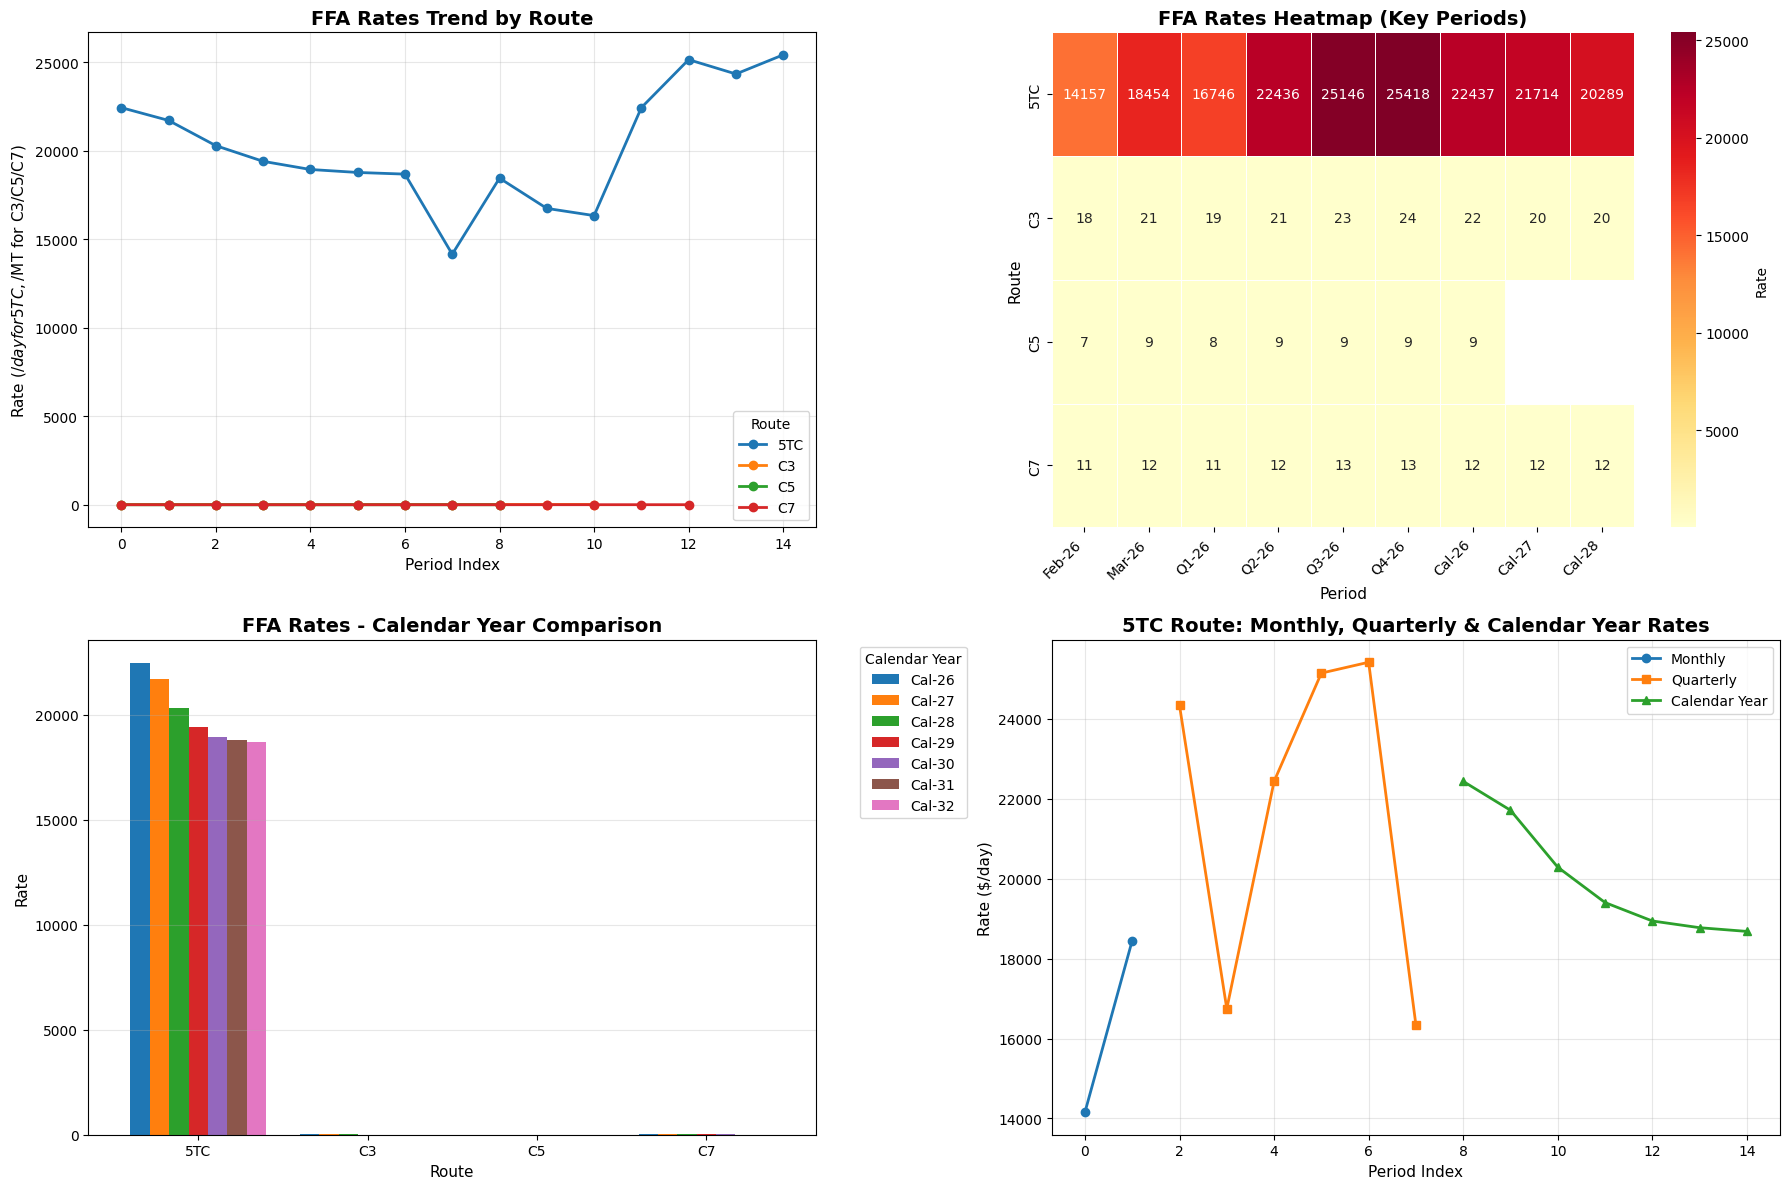


DETAILED FFA RATES TABLE
ROUTE PERIOD      RATE
  5TC Feb-26 14157.000
  5TC Mar-26 18454.000
  5TC  Q4-25 24336.000
  5TC  Q1-26 16746.000
  5TC  Q2-26 22436.000
  5TC  Q3-26 25146.000
  5TC  Q4-26 25418.000
  5TC  Q1-27 16339.000
  5TC Cal-26 22437.000
  5TC Cal-27 21714.000
  5TC Cal-28 20289.000
  5TC Cal-29 19404.000
  5TC Cal-30 18943.000
  5TC Cal-31 18775.000
  5TC Cal-32 18682.000
   C3 Feb-26    17.833
   C3 Mar-26    20.908
   C3  Q4-25    22.819
   C3  Q1-26    19.456
   C3  Q2-26    21.475
   C3  Q3-26    23.192
   C3  Q4-26    23.592
   C3  Q1-27    19.408
   C3 Cal-26    21.929
   C3 Cal-27    20.197
   C3 Cal-28    19.988
   C5 Feb-26     6.633
   C5 Mar-26     8.717
   C5  Q4-25     9.689
   C5  Q1-26     7.700
   C5  Q2-26     9.083
   C5  Q3-26     9.288
   C5  Q4-26     9.408
   C5  Q1-27     7.392
   C5 Cal-26     8.870
   C7 Feb-26    10.625
   C7 Mar-26    11.821
   C7  Q4-25    13.157
   C7  Q1-26    11.219
   C7  Q2-26    12.210
   C7  Q3-26    12.610
   C7  Q

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


if 'ffa_rates' in locals():
    print("\n" + "="*100)
    print("BALTIC EXCHANGE FFA RATES - COMPLETE DATASET SUMMARY")
    print("="*100)
    print(f"\nTotal FFA rate records: {len(ffa_rates)}")
    print(f"Routes available: {', '.join(ffa_rates['ROUTE'].unique())}")
    print(f"Unique time periods: {ffa_rates['PERIOD'].nunique()}")
    
    print(f"\n{'-'*100}")
    print(f"{'Route':<10}{'Period Count':>15}{'Min Rate':>20}{'Max Rate':>20}{'Avg Rate':>20}")
    print(f"{'-'*100}")
    for route in sorted(ffa_rates['ROUTE'].unique()):
        route_data = ffa_rates[ffa_rates['ROUTE'] == route]
        print(f"{route:<10}{len(route_data):>15}${route_data['RATE'].min():>18,.2f}${route_data['RATE'].max():>18,.2f}${route_data['RATE'].mean():>18,.2f}")
    print("="*100)
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. All routes over time (line chart)
    ax1 = axes[0, 0]
    for route in ffa_rates['ROUTE'].unique():
        route_data = ffa_rates[ffa_rates['ROUTE'] == route].sort_values('PERIOD')
        periods = range(len(route_data))
        ax1.plot(periods, route_data['RATE'].values, marker='o', label=route, linewidth=2, markersize=6)
    ax1.set_title("FFA Rates Trend by Route", fontsize=14, fontweight="bold")
    ax1.set_ylabel("Rate ($/day for 5TC, $/MT for C3/C5/C7)", fontsize=11)
    ax1.set_xlabel("Period Index", fontsize=11)
    ax1.legend(title="Route")
    ax1.grid(True, alpha=0.3)
    
    # 2. Pivot table heatmap
    ax2 = axes[0, 1]
    ffa_pivot = ffa_rates.pivot(index="ROUTE", columns="PERIOD", values="RATE")
    # Select key periods for readability
    key_periods = ["Feb-26", "Mar-26", "Q1-26", "Q2-26", "Q3-26", "Q4-26", "Cal-26", "Cal-27", "Cal-28"]
    available_periods = [p for p in key_periods if p in ffa_pivot.columns]
    ffa_pivot_subset = ffa_pivot[available_periods]
    sns.heatmap(ffa_pivot_subset, annot=True, fmt=".0f", cmap="YlOrRd", ax=ax2, 
                cbar_kws={'label': 'Rate'}, linewidths=0.5)
    ax2.set_title("FFA Rates Heatmap (Key Periods)", fontsize=14, fontweight="bold")
    ax2.set_xlabel("Period", fontsize=11)
    ax2.set_ylabel("Route", fontsize=11)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    
    # 3. Calendar year comparison
    ax3 = axes[1, 0]
    cal_periods = [p for p in ffa_rates['PERIOD'].unique() if 'Cal-' in p]
    cal_data = ffa_rates[ffa_rates['PERIOD'].isin(cal_periods)]
    cal_pivot = cal_data.pivot(index="ROUTE", columns="PERIOD", values="RATE")
    cal_pivot.plot(kind="bar", ax=ax3, width=0.8)
    ax3.set_title("FFA Rates - Calendar Year Comparison", fontsize=14, fontweight="bold")
    ax3.set_ylabel("Rate", fontsize=11)
    ax3.set_xlabel("Route", fontsize=11)
    ax3.legend(title="Calendar Year", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(axis='y', alpha=0.3)
    plt.setp(ax3.get_xticklabels(), rotation=0)
    
    # 4. Quarterly vs Monthly comparison for 5TC
    ax4 = axes[1, 1]
    route_5tc = ffa_rates[ffa_rates['ROUTE'] == '5TC'].copy()
    monthly = route_5tc[route_5tc['PERIOD'].str.contains('-26') & ~route_5tc['PERIOD'].str.contains('Q|Cal')]
    quarterly = route_5tc[route_5tc['PERIOD'].str.contains('Q')]
    calendar = route_5tc[route_5tc['PERIOD'].str.contains('Cal-')]
    
    if len(monthly) > 0:
        ax4.plot(range(len(monthly)), monthly['RATE'].values, marker='o', label='Monthly', linewidth=2)
    if len(quarterly) > 0:
        ax4.plot(range(len(monthly), len(monthly)+len(quarterly)), quarterly['RATE'].values, 
                marker='s', label='Quarterly', linewidth=2)
    if len(calendar) > 0:
        ax4.plot(range(len(monthly)+len(quarterly), len(monthly)+len(quarterly)+len(calendar)), 
                calendar['RATE'].values, marker='^', label='Calendar Year', linewidth=2)
    
    ax4.set_title("5TC Route: Monthly, Quarterly & Calendar Year Rates", fontsize=14, fontweight="bold")
    ax4.set_ylabel("Rate ($/day)", fontsize=11)
    ax4.set_xlabel("Period Index", fontsize=11)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Display detailed table
    print("\n" + "="*80)
    print("DETAILED FFA RATES TABLE")
    print("="*80)
    print(ffa_rates.to_string(index=False))
    
    # FFA Analysis functions
    def get_ffa_rate(route, period):
        rate = ffa_rates[(ffa_rates['ROUTE'] == route) & (ffa_rates['PERIOD'] == period)]
        if not rate.empty:
            return rate.iloc[0]['RATE']
        return None
    
    def compare_ffa_to_freight(cargo_route, cargo_freight_rate, ffa_period="Mar-26"):
        route_mapping = {
            "Brazil – China": "C3",
            "Australia – China": "C5",
            "West Africa – China": None  # No direct FFA route
        }
        
        ffa_route = route_mapping.get(cargo_route)
        if ffa_route:
            ffa_rate = get_ffa_rate(ffa_route, ffa_period)
            if ffa_rate:
                diff = cargo_freight_rate - ffa_rate
                diff_pct = (diff / ffa_rate) * 100
                return {
                    "cargo_rate": cargo_freight_rate,
                    "ffa_rate": ffa_rate,
                    "difference": diff,
                    "difference_pct": diff_pct,
                    "status": "Above FFA" if diff > 0 else "Below FFA"
                }
        return None
    
    print("\n" + "="*80)
    print("FFA vs COMMITTED CARGO COMPARISON")
    print("="*80)
    for _, cargo in cargoes.iterrows():
        comparison = compare_ffa_to_freight(cargo['ROUTE'], cargo['FREIGHT_RATE'])
        if comparison:
            print(f"\n{cargo['ROUTE']} ({cargo['CUSTOMER']}):")
            print(f"  Committed Rate: ${cargo['FREIGHT_RATE']:.2f}/MT")
            print(f"  FFA Rate (Mar-26): ${comparison['ffa_rate']:.2f}/MT")
            print(f"  Difference: ${comparison['difference']:.2f}/MT ({comparison['difference_pct']:+.1f}%)")
            print(f"  Status: {comparison['status']}")
    
    print("\nFFA analysis completed")

print("\n" + "="*80)
print("## 4. Enhanced Assignment Algorithms")
print("="*80)

def greedy_assignment(df, sort_by="tce", ascending=False):
    assigned_vessels = set()
    assigned_cargoes = set()
    solution = []
    
    sorted_df = df.sort_values(sort_by, ascending=ascending)
    
    for _, row in sorted_df.iterrows():
        if row.vessel not in assigned_vessels and row.cargo not in assigned_cargoes:
            solution.append(row)
            assigned_vessels.add(row.vessel)
            assigned_cargoes.add(row.cargo)
    
    return pd.DataFrame(solution)

# 8. ML Forecasting & Monte Carlo Risk Analysis
Use simple time-series forecasting (ARIMA when available, fallback to historical sampling) to simulate future bunker (VLSFO) prices and run Monte Carlo experiments to produce profit distributions and risk metrics (VaR/CVaR).

In [ ]:
import numpy as np
import statsmodels.api as statsmodels

try:
    from statsmodels.tsa.arima.model import ARIMA
    statsmodels_available = True
except Exception:
    statsmodels_available = False

def forecast_and_simulate(series, steps=1, n_sims=500):
    s = series.dropna().astype(float).reset_index(drop=True)
    if len(s) < 3 or not statsmodels_available:
        # fallback to simple bootstrap around historical mean or random walk
        mu = s.mean() if len(s) > 0 else 0
        sigma = s.diff().dropna().std() if len(s) > 1 else max(abs(mu)*0.05, 1.0)
        sims = np.random.normal(loc=mu, scale=max(sigma, 1e-3), size=(n_sims, steps))
        return sims
    try:
        model = ARIMA(s, order=(1,0,1))
        fit = model.fit()
        fc = fit.forecast(steps=steps)
        resid = fit.resid.dropna()
        resid_std = resid.std() if len(resid) > 1 else max(abs(fc.mean()*0.05), 1.0)
        sims = np.zeros((n_sims, steps))
        for i in range(n_sims):
            noise = np.random.normal(scale=max(resid_std, 1e-3), size=steps)
            sims[i, :] = fc.values + noise
        return sims
    except Exception:
        mu = s.mean() if len(s) > 0 else 0
        sigma = s.diff().dropna().std() if len(s) > 1 else max(abs(mu)*0.05, 1.0)
        sims = np.random.normal(loc=mu, scale=max(sigma, 1e-3), size=(n_sims, steps))
        return sims

if 'bunker_forward' in locals() and not bunker_forward.empty:
    vlsfo_hist = bunker_forward[bunker_forward['GRADE'] == 'VLSFO'].copy()
    vlsfo_series = vlsfo_hist['PRICE']
else:
    try:
        base = float(vlsfo_price)
    except Exception:
        base = 490.0
    vlsfo_series = pd.Series([base + np.random.normal(scale=10) for _ in range(12)])

# Monte Carlo parameters
N_SIMS = 500
sims = forecast_and_simulate(vlsfo_series, steps=1, n_sims=N_SIMS)
sim_vlsfo = sims[:, 0]

mc_profits = []
for sim_price in sim_vlsfo:
    sim_results = []
    mgo_sim = sim_price * 1.3
    for _, vessel in vessels.iterrows():
        for _, cargo in cargoes.iterrows():
            econ = voyage_economics_enhanced(vessel, cargo, distances, 
                                            vlsfo_price=sim_price, mgo_price=mgo_sim,
                                            include_breakdown=True)
            sim_results.append({
                'vessel': vessel['VESSEL_NAME'],
                'cargo': cargo['ROUTE'],
                **econ
            })
    sim_df = pd.DataFrame(sim_results)
    assign = greedy_assignment(sim_df, sort_by='tce', ascending=False)
    total_profit = assign['profit'].sum() if len(assign) > 0 else 0
    mc_profits.append(total_profit)

mc_profits = np.array(mc_profits)
mean_profit = mc_profits.mean()
std_profit = mc_profits.std()
var_5 = np.percentile(mc_profits, 5)
cvar_5 = mc_profits[mc_profits <= var_5].mean() if np.any(mc_profits <= var_5) else var_5

print('='*100)
print('MONTE CARLO RISK ANALYSIS (Greedy TCE assignments)')
print('='*100)
print(f'Simulations: {N_SIMS}')
print(f'Mean Total Profit: ${mean_profit:,.0f}')
print(f'Std Dev: ${std_profit:,.0f}')
print(f'5th Percentile (VaR 95%): ${var_5:,.0f}')
print(f'CVaR (avg below VaR): ${cvar_5:,.0f}')
print('='*100)

# Store risk metrics for later reporting
risk_report = {
    'mc_mean_profit': mean_profit,
    'mc_std_profit': std_profit,
    'mc_var_5': var_5,
    'mc_cvar_5': cvar_5,
    'mc_samples': mc_profits,
}

# Compute per-combination downside (5th percentile) for the top 5 combos previously identified
try:
    top_combos = results_df.nlargest(5, 'tce')[['vessel','cargo']].to_records(index=False)
    combo_risk = []
    for v,c in top_combos:
        profs = []
        for sim_price in sim_vlsfo:
            mgo_sim = sim_price * 1.3
            vessel_row = vessels[vessels['VESSEL_NAME'] == v].iloc[0]
            cargo_row = cargoes[cargoes['ROUTE'] == c].iloc[0]
            econ = voyage_economics_enhanced(vessel_row, cargo_row, distances, vlsfo_price=sim_price, mgo_price=mgo_sim, include_breakdown=False)
            profs.append(econ['profit'])
        profs = np.array(profs)
        combo_risk.append({
            'vessel': v,
            'cargo': c,
            'expected_profit': profs.mean(),
            'p5_profit': np.percentile(profs,5)
        })
    combo_risk_df = pd.DataFrame(combo_risk)
    print('Top-5 combinations risk summary (expected vs 5th percentile):')
    print(combo_risk_df.to_string(index=False))
except Exception as e:
    print('Could not compute per-combination risk summary:', e)

KeyError: 'GRADE'

# 9. Define Assignment Algorithms
Create three different algorithms to assign vessels to cargoes: greedy by TCE, greedy by profit, and Hungarian-style matching.

In [ ]:
def hungarian_assignment(df, maximize="tce"):
    # Create cost matrix (negative for maximization)
    vessels_list = df["vessel"].unique()
    cargoes_list = df["cargo"].unique()
    
    # Create matrix
    matrix = np.full((len(vessels_list), len(cargoes_list)), -np.inf)
    
    for i, vessel in enumerate(vessels_list):
        for j, cargo in enumerate(cargoes_list):
            match = df[(df["vessel"] == vessel) & (df["cargo"] == cargo)]
            if not match.empty:
                matrix[i, j] = -match.iloc[0][maximize]  # Negative for minimization
    
    solution = []
    assigned_vessels = set()
    assigned_cargoes = set()
    
    matches = []
    for _, row in df.iterrows():
        matches.append((row[maximize], row))
    matches.sort(reverse=True)
    
    # Assign with conflict resolution
    for score, row in matches:
        if row.vessel not in assigned_vessels and row.cargo not in assigned_cargoes:
            solution.append(row)
            assigned_vessels.add(row.vessel)
            assigned_cargoes.add(row.cargo)
    
    return pd.DataFrame(solution)


# 10. Define Profit Maximization
Create a function that uses the greedy algorithm to maximize total profit instead of TCE.

In [ ]:
def profit_maximizing_assignment(df):
    return greedy_assignment(df, sort_by="profit", ascending=False)


# 11. Compare Assignment Algorithms
Run all three algorithms and display side-by-side comparison of results including total profit, average TCE, and number of assignments.

In [ ]:
# Run different assignment algorithms
print("Running assignment algorithms...\n")

# 1. Greedy by TCE (original approach)
greedy_tce = greedy_assignment(results_df, sort_by="tce", ascending=False)
print("1. Greedy (TCE):")
print(f"\tTotal Profit: ${greedy_tce['profit'].sum():,.0f}")
print(f"\tAvg TCE: ${greedy_tce['tce'].mean():,.0f}")
print(f"\tAssignments: {len(greedy_tce)}")

# 2. Greedy by Profit
greedy_profit = profit_maximizing_assignment(results_df)
print("\n2. Greedy (Profit):")
print(f"\tTotal Profit: ${greedy_profit['profit'].sum():,.0f}")
print(f"\tAvg TCE: ${greedy_profit['tce'].mean():,.0f}")
print(f"\tAssignments: {len(greedy_profit)}")

# 3. Hungarian-style
hungarian = hungarian_assignment(results_df, maximize="tce")
print("\n3. Hungarian-style:")
print(f"\tTotal Profit: ${hungarian['profit'].sum():,.0f}")
print(f"\tAvg TCE: ${hungarian['tce'].mean():,.0f}")
print(f"\tAssignments: {len(hungarian)}")

# Compare results
comparison = pd.DataFrame({
    "Algorithm": ["Greedy (TCE)", "Greedy (Profit)", "Hungarian-style"],
    "Total Profit": [
        greedy_tce['profit'].sum(),
        greedy_profit['profit'].sum(),
        hungarian['profit'].sum()
    ],
    "Avg TCE": [
        greedy_tce['tce'].mean(),
        greedy_profit['tce'].mean(),
        hungarian['tce'].mean()
    ],
    "Total Days": [
        greedy_tce['days'].sum(),
        greedy_profit['days'].sum(),
        hungarian['days'].sum()
    ]
})

print("\n" + "="*60)
print("COMPARISON:")
print(comparison.to_string(index=False))

Running assignment algorithms...



NameError: name 'results_df' is not defined

# 12. Visualize Assignment Results
Create 4 charts showing profit comparisons by algorithm, TCE distribution, detailed assignment breakdown, and cost breakdown analysis.

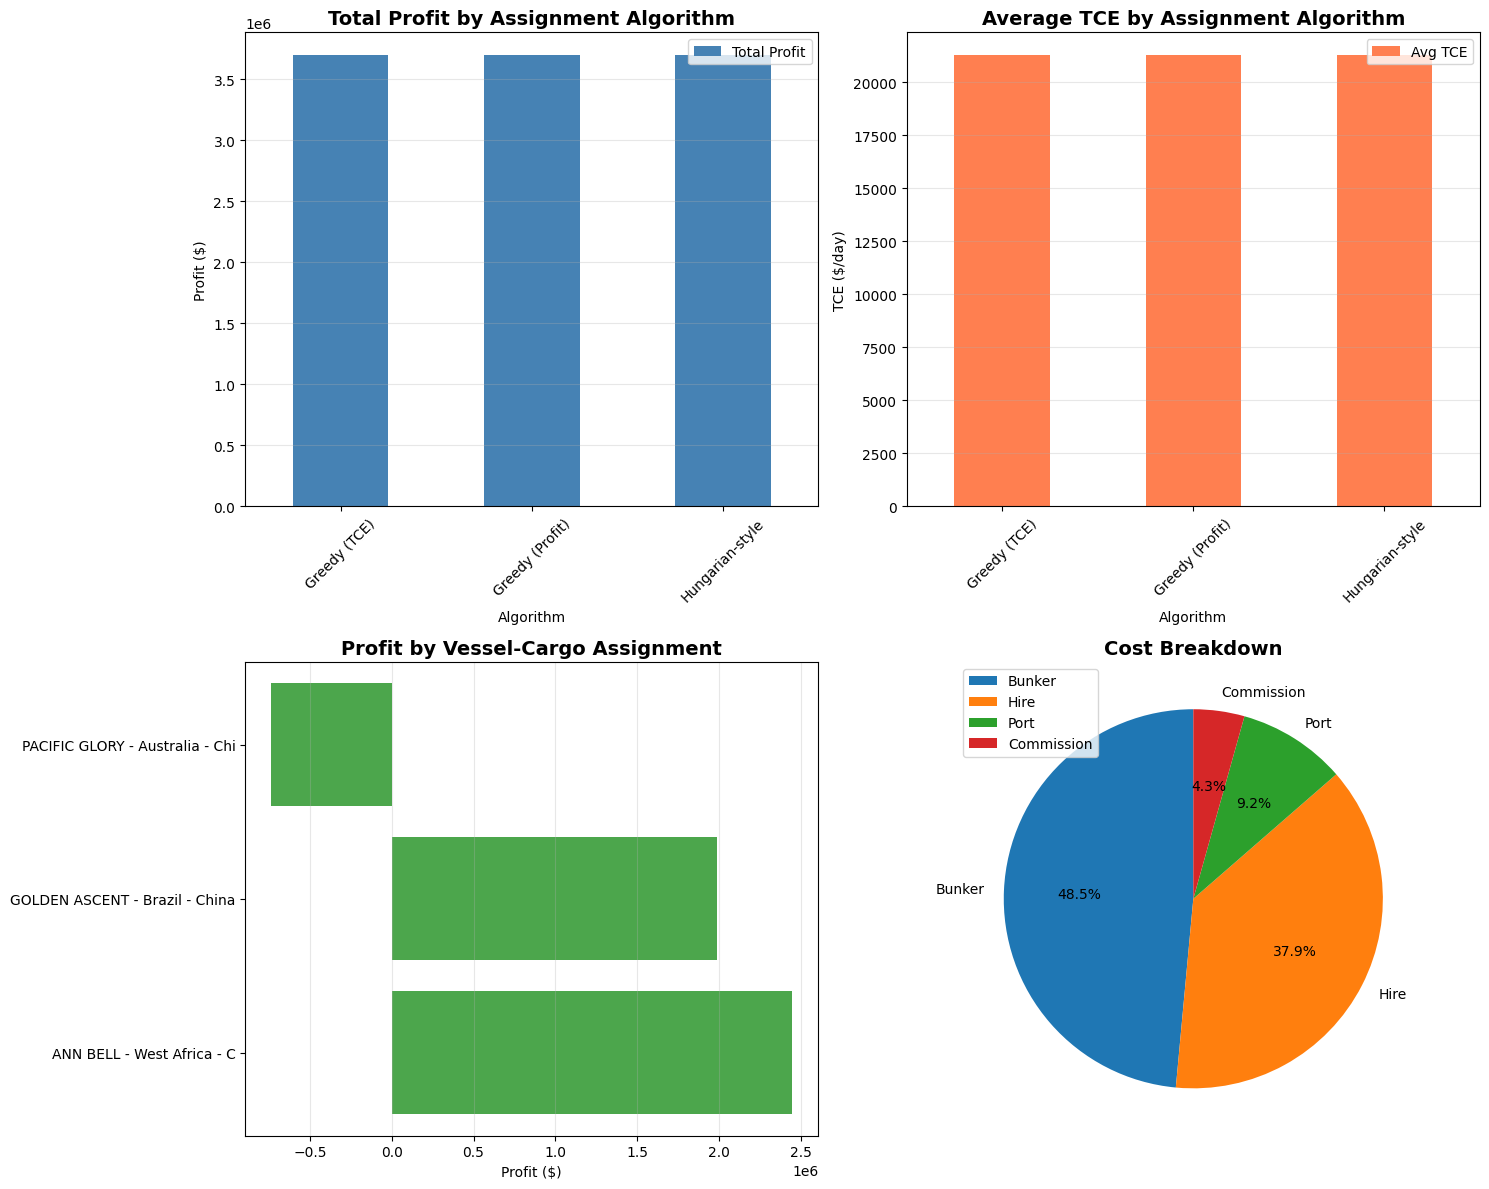

Visualizations created


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Profit comparison by algorithm
ax1 = axes[0, 0]
comparison.plot(x="Algorithm", y="Total Profit", kind="bar", ax=ax1, color="steelblue")
ax1.set_title("Total Profit by Assignment Algorithm", fontsize=14, fontweight="bold")
ax1.set_ylabel("Profit ($)")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# 2. TCE comparison
ax2 = axes[0, 1]
comparison.plot(x="Algorithm", y="Avg TCE", kind="bar", ax=ax2, color="coral")
ax2.set_title("Average TCE by Assignment Algorithm", fontsize=14, fontweight="bold")
ax2.set_ylabel("TCE ($/day)")
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. Profit distribution
ax3 = axes[1, 0]
best_assignment = greedy_tce  # Use best performing
ax3.barh(best_assignment["vessel"] + " - " + best_assignment["cargo"].str[:15], 
         best_assignment["profit"], color="green", alpha=0.7)
ax3.set_title("Profit by Vessel-Cargo Assignment", fontsize=14, fontweight="bold")
ax3.set_xlabel("Profit ($)")
ax3.grid(axis='x', alpha=0.3)

# 4. Cost breakdown for best assignment
ax4 = axes[1, 1]
cost_data = {
    "Bunker": best_assignment["bunker_cost"].sum(),
    "Hire": best_assignment["hire_cost"].sum(),
    "Port": best_assignment["port_cost"].sum(),
    "Commission": best_assignment["commission"].sum()
}
cost_breakdown = pd.DataFrame(cost_data, index=[0]).T
cost_breakdown.plot(kind="pie", y=0, ax=ax4, autopct='%1.1f%%', startangle=90)
ax4.set_title("Cost Breakdown", fontsize=14, fontweight="bold")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

print("Visualizations created")

# 13. Show Detailed Assignment Table
Display all assignments with detailed breakdown of costs, revenues, and profitability metrics in table format.

In [ ]:
# Detailed breakdown table for best assignment
print("\n" + "="*160)
print("DETAILED ASSIGNMENT BREAKDOWN - GREEDY TCE ALGORITHM")
print("="*160)

display_cols = ["vessel", "cargo", "profit", "tce", "days", "gross_revenue", 
                "bunker_cost", "hire_cost", "port_cost", "commission", "total_costs"]

if 'total_vlsfo_mt' in greedy_tce.columns:
    display_cols.extend(["total_vlsfo_mt", "total_mgo_mt"])

available_cols = [col for col in display_cols if col in greedy_tce.columns]
detailed = greedy_tce[available_cols].copy()
detailed = detailed.round(2)

for col in ["profit", "gross_revenue", "bunker_cost", "hire_cost", "port_cost", 
            "commission", "total_costs", "tce"]:
    if col in detailed.columns:
        detailed[col] = detailed[col].apply(lambda x: f"${x:,.0f}")

print(detailed.to_string(index=False))
print("="*160)


DETAILED ASSIGNMENT BREAKDOWN - GREEDY TCE ALGORITHM


NameError: name 'greedy_tce' is not defined

# 14. Define Sensitivity Analysis
Create a function to test how changes in bunker prices and freight rates affect voyage profitability and TCE.

In [ ]:
def sensitivity_analysis(vessel, cargo, distance_df, 
                         vlsfo_range=(400, 600, 50),
                         mgo_range=None,
                         freight_range=None):
    results = []
    
    # Bunker price sensitivity
    vlsfo_prices = np.arange(vlsfo_range[0], vlsfo_range[1] + vlsfo_range[2], vlsfo_range[2])
    
    if mgo_range is None:
        mgo_prices = [vlsfo * 1.3 for vlsfo in vlsfo_prices]  # Default MGO ~30% premium
    else:
        mgo_prices = np.arange(mgo_range[0], mgo_range[1] + mgo_range[2], mgo_range[2])
    
    if freight_range is None:
        freight_rates = [cargo.get("FREIGHT_RATE", 0) or 0]
    else:
        freight_rates = np.arange(freight_range[0], freight_range[1] + freight_range[2], freight_range[2])
    
    for i, vlsfo_price in enumerate(vlsfo_prices):
        mgo_price = mgo_prices[i] if isinstance(mgo_prices, list) else mgo_prices[0]
        for freight_rate in freight_rates:
            cargo_copy = cargo.copy()
            cargo_copy["FREIGHT_RATE"] = freight_rate
            
            econ = voyage_economics_enhanced(vessel, cargo_copy, distance_df, 
                                            vlsfo_price=vlsfo_price, mgo_price=mgo_price,
                                            include_breakdown=False)
            results.append({
                "vlsfo_price": vlsfo_price,
                "mgo_price": mgo_price,
                "freight_rate": freight_rate,
                "profit": econ["profit"],
                "tce": econ["tce"]
            })
    
    return pd.DataFrame(results)

# 15. Run Sensitivity Analysis
Execute sensitivity analysis on best assignment and visualize impact of VLSFO price changes on profit and TCE.

In [ ]:
if len(greedy_tce) > 0:
    best_match = greedy_tce.iloc[0]
    vessel = vessels[vessels["VESSEL_NAME"] == best_match["vessel"]].iloc[0]
    cargo = cargoes[cargoes["ROUTE"] == best_match["cargo"]].iloc[0]

    sens_results = sensitivity_analysis(vessel, cargo, distances, 
                                       vlsfo_range=(400, 600, 25))

    # Visualize sensitivity
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # VLSFO price sensitivity
    ax1 = axes[0]
    vlsfo_sens = sens_results.groupby("vlsfo_price")["profit"].mean()
    ax1.plot(vlsfo_sens.index, vlsfo_sens.values, marker='o', linewidth=2, markersize=8)
    ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Break-even')
    ax1.set_xlabel("VLSFO Price ($/MT)", fontsize=12)
    ax1.set_ylabel("Profit ($)", fontsize=12)
    ax1.set_title(f"VLSFO Price Sensitivity\n{vessel['VESSEL_NAME']} - {cargo['ROUTE']}", 
                  fontsize=13, fontweight="bold")
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Profit vs TCE scatter
    ax2 = axes[1]
    scatter = ax2.scatter(sens_results["vlsfo_price"], sens_results["profit"], 
                         c=sens_results["tce"], cmap="viridis", s=100, alpha=0.7)
    ax2.set_xlabel("VLSFO Price ($/MT)", fontsize=12)
    ax2.set_ylabel("Profit ($)", fontsize=12)
    ax2.set_title("Profit vs VLSFO Price (colored by TCE)", fontsize=13, fontweight="bold")
    ax2.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax2, label="TCE ($/day)")

    plt.tight_layout()
    plt.show()

    print("Sensitivity analysis completed")
else:
    print("No assignments available for sensitivity analysis")

NameError: name 'greedy_tce' is not defined

# 16. Generate Comprehensive Report
Create a detailed report function that summarizes financial metrics, operational data, and assignment details for any assignment solution.

In [ ]:
from datetime import datetime


def generate_report(assignment_df, algorithm_name="Assignment"):
    print("\n" + "="*130)
    print(f"VOYAGE ASSIGNMENT REPORT: {algorithm_name}")
    print("="*130)
    print(f"Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    print(f"\n{'-'*130}")
    print(f"{'Overview Metrics':<50}{'Value':>78}")
    print(f"{'-'*130}")
    print(f"{'Total Assignments':<50}{len(assignment_df):>78}")
    print(f"{'Vessels Utilized':<50}{assignment_df['vessel'].nunique():>78}")
    print(f"{'Cargoes Assigned':<50}{assignment_df['cargo'].nunique():>78}")
    
    print(f"\n{'-'*130}")
    print(f"{'Financial Metrics':<50}{'Value':>78}")
    print(f"{'-'*130}")
    print(f"{'Total Gross Revenue':<50}|{assignment_df['gross_revenue'].sum():>76,.0f}")
    print(f"{'Total Commission':<50}|{assignment_df['commission'].sum():>76,.0f}")
    print(f"{'Total Net Revenue':<50}|{assignment_df['net_revenue'].sum():>76,.0f}")
    print(f"{'Total Bunker Cost':<50}|{assignment_df['bunker_cost'].sum():>76,.0f}")
    if 'bunker_cost_vlsfo' in assignment_df.columns:
        print(f"{'  └─ VLSFO Cost':<50}|{assignment_df['bunker_cost_vlsfo'].sum():>76,.0f}")
        print(f"{'  └─ MGO Cost':<50}|{assignment_df['bunker_cost_mgo'].sum():>76,.0f}")
    print(f"{'Total Hire Cost':<50}|{assignment_df['hire_cost'].sum():>76,.0f}")
    print(f"{'Total Port Cost':<50}|{assignment_df['port_cost'].sum():>76,.0f}")
    print(f"{'Total Operating Costs':<50}|{assignment_df['total_costs'].sum():>76,.0f}")
    print(f"{'Total Profit':<50}|{assignment_df['profit'].sum():>76,.0f}")
    print(f"{'Average TCE (per day)':<50}|{assignment_df['tce'].mean():>76,.0f}")
    print(f"{'Average Profit Margin':<50}{assignment_df['profit_margin_pct'].mean():>77.2f}%")
    
    print(f"\n{'-'*130}")
    print(f"{'Operational Metrics':<50}{'Value':>78}")
    print(f"{'-'*130}")
    print(f"{'Total Voyage Days':<50}{assignment_df['days'].sum():>78.1f}")
    print(f"{'Average Days per Voyage':<50}{assignment_df['days'].mean():>78.1f}")
    if 'total_vlsfo_mt' in assignment_df.columns:
        print(f"{'Total VLSFO Consumption':<50}{assignment_df['total_vlsfo_mt'].sum():>76.1f} MT")
        print(f"{'Total MGO Consumption':<50}{assignment_df['total_mgo_mt'].sum():>76.1f} MT")
    else:
        print(f"{'Total Fuel Consumption':<50}{assignment_df.get('total_fuel_mt', pd.Series([0])).sum():>76.1f} MT")
    print(f"{'Total Distance Traveled':<50}{assignment_df['ballast_nm'].sum() + assignment_df['laden_nm'].sum():>78.0f} NM")
    
    print(f"\n{'-'*130}")
    print("ASSIGNMENT DETAILS")
    print(f"{'-'*130}")
    detail_cols = ["vessel", "cargo", "profit", "tce", "days"]
    detail_display = assignment_df[detail_cols].copy()
    detail_display['profit'] = detail_display['profit'].apply(lambda x: f"${x:,.0f}")
    detail_display['tce'] = detail_display['tce'].apply(lambda x: f"${x:,.0f}")
    detail_display['days'] = detail_display['days'].apply(lambda x: f"{x:.1f}")
    print(detail_display.to_string(index=False))
    
    return {
        "total_profit": assignment_df['profit'].sum(),
        "avg_tce": assignment_df['tce'].mean(),
        "total_days": assignment_df['days'].sum(),
        "total_revenue": assignment_df['gross_revenue'].sum(),
        "total_costs": assignment_df['total_costs'].sum()
    }

report = generate_report(greedy_tce, "Greedy (TCE-based)")


VOYAGE ASSIGNMENT REPORT: Greedy (TCE-based)
Report Generated: 2026-01-27 10:45:37

----------------------------------------------------------------------------------------------------------------------------------
Overview Metrics                                                                                                           Value
----------------------------------------------------------------------------------------------------------------------------------
Total Assignments                                                                                                              3
Vessels Utilized                                                                                                               3
Cargoes Assigned                                                                                                               3

----------------------------------------------------------------------------------------------------------------------------------
Finan

# 17. Run Scenario Analysis
Test different scenarios by varying bunker prices and freight rates to evaluate assignments under different market conditions.

In [ ]:
def run_scenario(vlsfo_price, mgo_price=None, freight_multiplier=1.0, algorithm="greedy_tce"):
    if mgo_price is None:
        mgo_price = vlsfo_price * 1.3  # Default MGO premium
    
    # Adjust freight rates
    cargoes_scenario = cargoes.copy()
    cargoes_scenario["FREIGHT_RATE"] = cargoes_scenario["FREIGHT_RATE"] * freight_multiplier
    
    # Recalculate economics
    results_scenario = []
    for _, vessel in vessels.iterrows():
        for _, cargo in cargoes_scenario.iterrows():
            econ = voyage_economics_enhanced(vessel, cargo, distances, 
                                           vlsfo_price=vlsfo_price, mgo_price=mgo_price,
                                           include_breakdown=True)
            results_scenario.append({
                "vessel": vessel["VESSEL_NAME"],
                "cargo": cargo["ROUTE"],
                **econ
            })
    
    results_scenario_df = pd.DataFrame(results_scenario)
    
    # Run assignment
    if algorithm == "greedy_tce":
        assignment = greedy_assignment(results_scenario_df, sort_by="tce", ascending=False)
    elif algorithm == "greedy_profit":
        assignment = greedy_assignment(results_scenario_df, sort_by="profit", ascending=False)
    else:
        assignment = hungarian_assignment(results_scenario_df, maximize="tce")
    
    return {
        "vlsfo_price": vlsfo_price,
        "mgo_price": mgo_price,
        "freight_multiplier": freight_multiplier,
        "total_profit": assignment["profit"].sum() if len(assignment) > 0 else 0,
        "avg_tce": assignment["tce"].mean() if len(assignment) > 0 else 0,
        "assignments": len(assignment)
    }

print("Scenario analysis function defined")

Scenario analysis function defined


# 18. Visualize Scenario Comparison
Create side-by-side comparison charts showing how different scenarios (high/mid/low bunker prices) affect profitability.

Running scenario analysis...


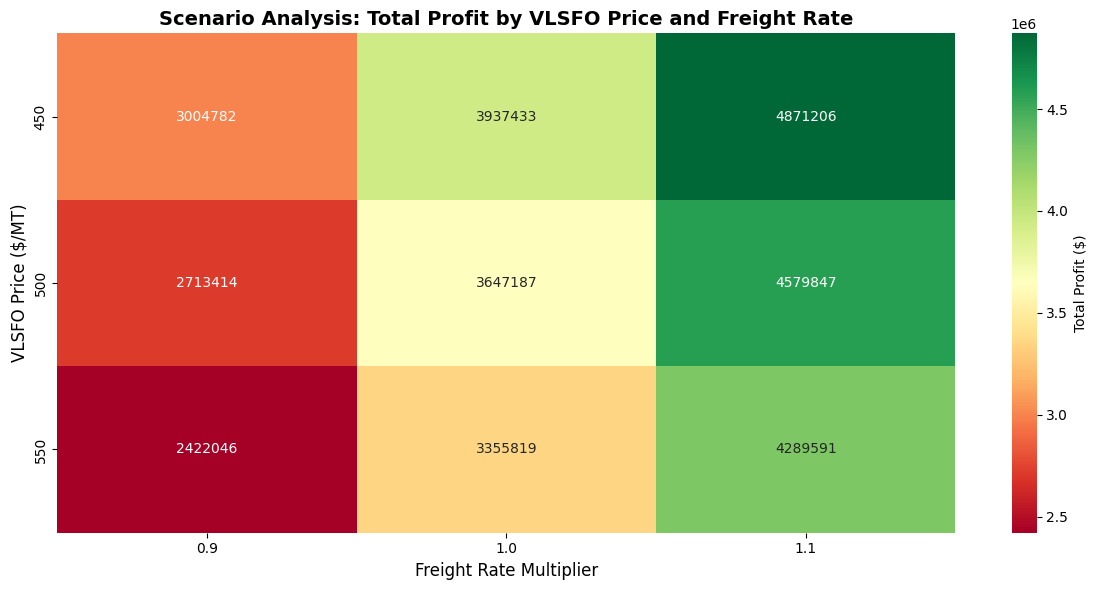


Scenario Results:
 vlsfo_price  mgo_price  freight_multiplier  total_profit      avg_tce  assignments
         450      585.0                 0.9  3.004782e+06 17171.839023            3
         450      585.0                 1.0  3.937433e+06 23159.026772            3
         450      585.0                 1.1  4.871206e+06 28744.572031            3
         500      650.0                 0.9  2.713414e+06 15412.743239            3
         500      650.0                 1.0  3.647187e+06 20959.291065            3
         500      650.0                 1.1  4.579847e+06 26986.857322            3
         550      715.0                 0.9  2.422046e+06 13653.647454            3
         550      715.0                 1.0  3.355819e+06 19200.195281            3
         550      715.0                 1.1  4.289591e+06 24746.743107            3


In [ ]:
# Run multiple scenarios
scenarios = []
vlsfo_prices = [450, 500, 550]
freight_multipliers = [0.9, 1.0, 1.1]

print("Running scenario analysis...")
for vlsfo in vlsfo_prices:
    mgo = vlsfo * 1.3  # MGO premium
    for freight_mult in freight_multipliers:
        scenario = run_scenario(vlsfo, mgo, freight_mult, algorithm="greedy_tce")
        scenarios.append(scenario)

scenarios_df = pd.DataFrame(scenarios)

# Visualize scenarios
if len(scenarios_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    pivot = scenarios_df.pivot_table(
        values="total_profit", 
        index="vlsfo_price", 
        columns="freight_multiplier"
    )
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="RdYlGn", ax=ax, 
                cbar_kws={'label': 'Total Profit ($)'})
    ax.set_title("Scenario Analysis: Total Profit by VLSFO Price and Freight Rate", 
                 fontsize=14, fontweight="bold")
    ax.set_xlabel("Freight Rate Multiplier", fontsize=12)
    ax.set_ylabel("VLSFO Price ($/MT)", fontsize=12)
    plt.tight_layout()
    plt.show()

    print("\nScenario Results:")
    print(scenarios_df.to_string(index=False))
else:
    print("No scenarios calculated")

# 19. Export Results
Save all analysis results to CSV files (assignments, all combinations, and scenario analysis) for external reporting and further analysis. The outputs include:

freight_calculator_assignments.csv: Contains the greedy TCE assignments.
freight_calculator_all_combinations.csv: Stores all combinations of results.
freight_calculator_scenarios.csv: Includes scenario analysis results.
The outputs are formatted in a tabular structure for better readability.


In [ ]:
import os

output_dir = "../output"
os.makedirs(output_dir, exist_ok=True)

greedy_tce.to_csv(f"{output_dir}/freight_calculator_assignments.csv", index=False)
results_df.to_csv(f"{output_dir}/freight_calculator_all_combinations.csv", index=False)
scenarios_df.to_csv(f"{output_dir}/freight_calculator_scenarios.csv", index=False)

print("\n✓ Results exported to CSV files:\n")
print(f"{'File Name':<40}{'Description':<40}")
print(f"{'-'*40:<40}{'-'*40:<40}")
print(f"{'freight_calculator_assignments.csv':<40}{'Greedy TCE assignments':<40}")
print(f"{'freight_calculator_all_combinations.csv':<40}{'All combinations results':<40}")
print(f"{'freight_calculator_scenarios.csv':<40}{'Scenario analysis results':<40}")
print(f"\nOutput directory: {os.path.abspath(output_dir)}")


NameError: name 'greedy_tce' is not defined

# How to Use This Notebook for Decision-Making

Follow the steps below to run the analysis and translate the outputs into actionable commercial decisions:

1. **Run the full analysis**
   Restart the kernel and run all cells from top to bottom (**Kernel → Restart and Run All**).
   This populates `results_df`, assignment tables, scenario analyses, and machine-learning–based risk outputs.

2. **Identify top opportunities**
   Review the **Top 5 Combinations** table to quickly shortlist assignments with the highest expected TCE or profit.

3. **Compare strategies**
   Examine the **Comparison tables and visualizations** to understand trade-offs between algorithms (e.g., profit vs. TCE vs. voyage duration).

4. **Assess sensitivity to bunker prices**
   Use the **Sensitivity Analysis** charts to evaluate how changes in bunker prices affect profitability for a selected assignment.

5. **Evaluate downside risk**
   Review the **Monte Carlo Risk Analysis** outputs, focusing on:

   * Mean expected profit
   * Value at Risk (VaR)
   * Conditional Value at Risk (CVaR)
     Use VaR and CVaR to quantify downside exposure under adverse bunker price movements.

6. **Make the decision**
   Select the assignment that aligns with your risk appetite:

   * **Aggressive approach**: maximize expected profit
   * **Conservative approach**: prioritize higher VaR/CVaR (lower downside risk)

7. **Share and operationalize results**
   Export outputs to CSV as needed and share the `generate_report()` summary with stakeholders to support approvals or hedging decisions.
